In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, classification_report, accuracy_score

In [2]:
plt.rcParams['figure.figsize']=(25, 8)

In [3]:
data_read = pd.read_csv('course_project_train.csv')
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [4]:
def renams(data):
    name_columns = {'Home Ownership': 'домовладение', 'Annual Income': 'годовой доход', 'Years in current job': 'количество лет на текущем месте работы',
        'Maximum Open Credit': 'наибольший открытый кредит', 'Number of Credit Problems': 'количество проблем с кредитом',
        'Months since last delinquent': 'количество месяцев с последней просрочки платежа', 'Bankruptcies': 'банкротства',
        'Purpose': 'цель кредита', 'Term': 'срок кредита', 'Current Loan Amount': 'текущая сумма кредита',
        'Current Credit Balance': 'текущий кредитный баланс', 'Monthly Debt': 'ежемесячный долг', 'Credit Score': 'кредитный рейтинг',
        'Credit Default': '0 - погашен вовремя, 1 - просрочка', 'Tax Liens': 'налоговые льготы', 
       'Number of Open Accounts': 'количество открытых счетов', 'Years of Credit History': 'количество лет кредитной истории'}
    data.rename(columns=name_columns, inplace=True)
    return data


In [5]:
data_read = renams(data_read)

In [6]:
data = data_read.drop('0 - погашен вовремя, 1 - просрочка', axis=1)
target = data_read['0 - погашен вовремя, 1 - просрочка']

### data, target 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   домовладение                                      7500 non-null   object 
 1   годовой доход                                     5943 non-null   float64
 2   количество лет на текущем месте работы            7129 non-null   object 
 3   налоговые льготы                                  7500 non-null   float64
 4   количество открытых счетов                        7500 non-null   float64
 5   количество лет кредитной истории                  7500 non-null   float64
 6   наибольший открытый кредит                        7500 non-null   float64
 7   количество проблем с кредитом                     7500 non-null   float64
 8   количество месяцев с последней просрочки платежа  3419 non-null   float64
 9   банкротства        

### dummy переменные

In [8]:
def dummy(data, name):
    x = data[name].unique()
    for i in range(len(data[name].unique())):
        y = name+'_'+ str(i)
        data[y] = 3
        data[y][data[name]==x[i]] = 1
        data[y][data[name]!=x[i]] = 0
    data.drop(name, axis=1, inplace=True)
            
            
# dummy('домовладение')

### заполнение год доход и кредитный рейтинг

In [9]:
def god_dohod(data):
    data['годовой доход'].fillna(0, inplace=True)
    data['кредитный рейтинг'].fillna(0, inplace=True)
    data['банкротства'].fillna(0, inplace=True)
    data['количество месяцев с последней просрочки платежа'].fillna(0, inplace=True)

In [10]:
god_dohod(data)
dummy(data, 'домовладение')
dummy(data, 'количество лет на текущем месте работы')
dummy(data, 'цель кредита')
dummy(data, 'срок кредита')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   годовой доход                                     7500 non-null   float64
 1   налоговые льготы                                  7500 non-null   float64
 2   количество открытых счетов                        7500 non-null   float64
 3   количество лет кредитной истории                  7500 non-null   float64
 4   наибольший открытый кредит                        7500 non-null   float64
 5   количество проблем с кредитом                     7500 non-null   float64
 6   количество месяцев с последней просрочки платежа  7500 non-null   float64
 7   банкротства                                       7500 non-null   float64
 8   текущая сумма кредита                             7500 non-null   float64
 9   текущий кредитный б

### проба без обработки данных

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
from xgboost import XGBClassifier


[15:41:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1592
           1       0.64      0.42      0.50       658

    accuracy                           0.76      2250
   macro avg       0.71      0.66      0.67      2250
weighted avg       0.74      0.76      0.74      2250



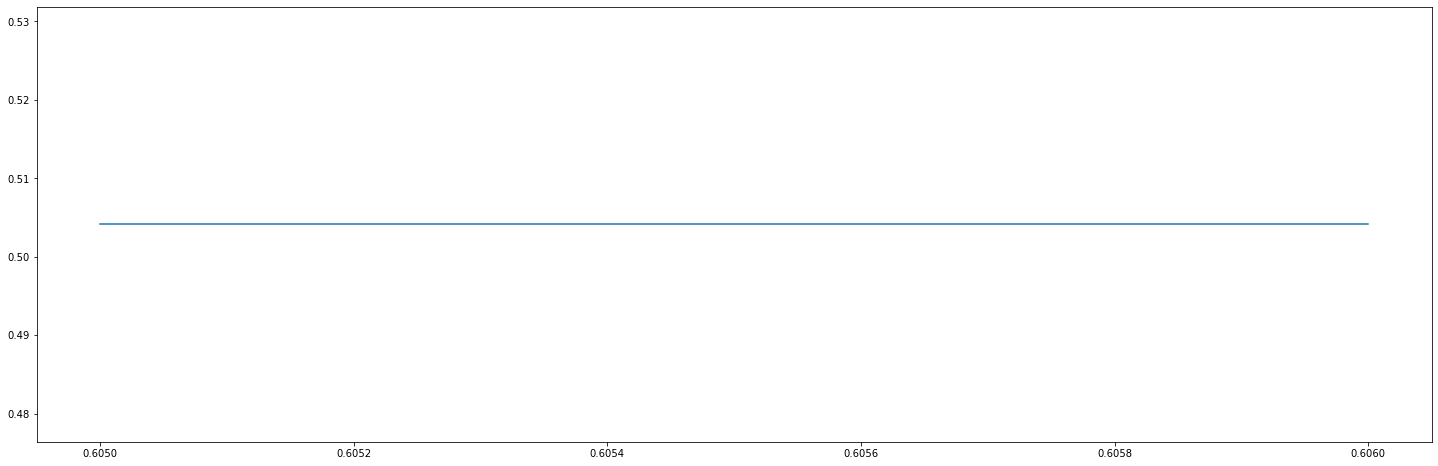

In [12]:
qwe = []
qw = []
q = (i/1000 for i in range(605, 607))
for i in q:
    xgb = XGBClassifier(eta=0.62, max_depth=8, n_jobs=7)
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
    qwe.append(i)
print(classification_report(y_test, y_pred))
plt.plot(qwe, qw)
plt.show()

In [13]:
f1_score(y_test, y_pred)

0.5041246562786436

### подготовка данных

In [14]:
from scipy.stats import shapiro, ttest_ind, chi2, mannwhitneyu

In [15]:
del_data = []
good_data = []
pv = 0.05
for i in data.keys():
    if len(data[i].unique())>2:
        if shapiro(data[i]).pvalue > pv:
            print(i , 'норм' if ttest_ind(data[i][target == 0], data[i][target == 1]).pvalue <= pv else 'удаляем')
            good_data.append(i) if ttest_ind(data[i][target == 0], data[i][target == 1]).pvalue <= pv else del_data.append(i)
        elif shapiro(data[i]).pvalue < pv:
            print(i , 'норм' if mannwhitneyu(data[i][target == 0], data[i][target == 1]).pvalue <= pv else 'удаляем')
            good_data.append(i) if mannwhitneyu(data[i][target == 0], data[i][target == 1]).pvalue <= pv else del_data.append(i)
    

годовой доход норм
налоговые льготы норм
количество открытых счетов норм
количество лет кредитной истории норм
наибольший открытый кредит норм
количество проблем с кредитом удаляем
количество месяцев с последней просрочки платежа удаляем
банкротства удаляем
текущая сумма кредита норм
текущий кредитный баланс удаляем
ежемесячный долг норм
кредитный рейтинг норм


In [16]:
del_data, good_data

(['количество проблем с кредитом',
  'количество месяцев с последней просрочки платежа',
  'банкротства',
  'текущий кредитный баланс'],
 ['годовой доход',
  'налоговые льготы',
  'количество открытых счетов',
  'количество лет кредитной истории',
  'наибольший открытый кредит',
  'текущая сумма кредита',
  'ежемесячный долг',
  'кредитный рейтинг'])

In [17]:
# data.drop(del_data, axis=1, inplace=True)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1592
           1       0.68      0.39      0.49       658

    accuracy                           0.77      2250
   macro avg       0.73      0.66      0.67      2250
weighted avg       0.76      0.77      0.75      2250



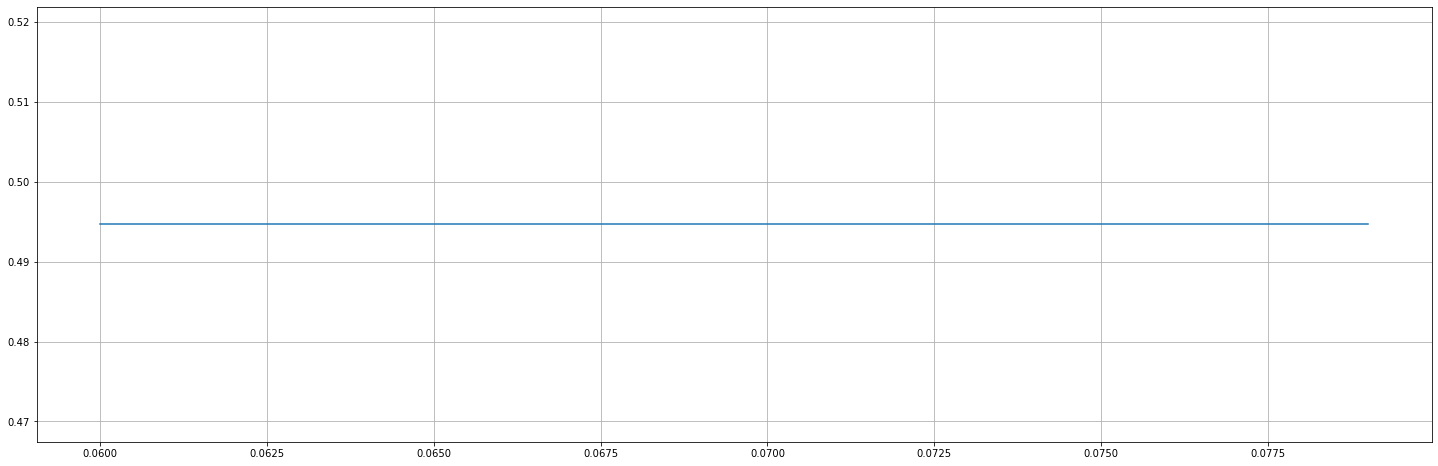

In [78]:

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
qwe = []
qw = []
q = (i/1000 for i in range(60, 80))
# q = range(1, 60)
for i in q:
    xgb = XGBClassifier(eta=0.074, max_depth=19, verbosity=0, n_estimators=19, n_jobs=7, reg_alpha=0.66) 
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)
    qw.append(f1_score(y_test, y_pred))
    qwe.append(i)
print(classification_report(y_test, y_pred))
plt.plot(qwe, qw)
plt.grid()
plt.show()

In [79]:
y_proba = xgb.predict_proba(x_test)
y_proba = pd.DataFrame(y_proba, columns=['1', '2'])
y_proba

,1,2
0,0.125351,0.874649
1,0.742575,0.257425
2,0.752471,0.247529
3,0.586281,0.413719
4,0.877662,0.122338
...,...,...
2245,0.654894,0.345106
2246,0.125351,0.874649
2247,0.794251,0.205749
2248,0.125351,0.874649


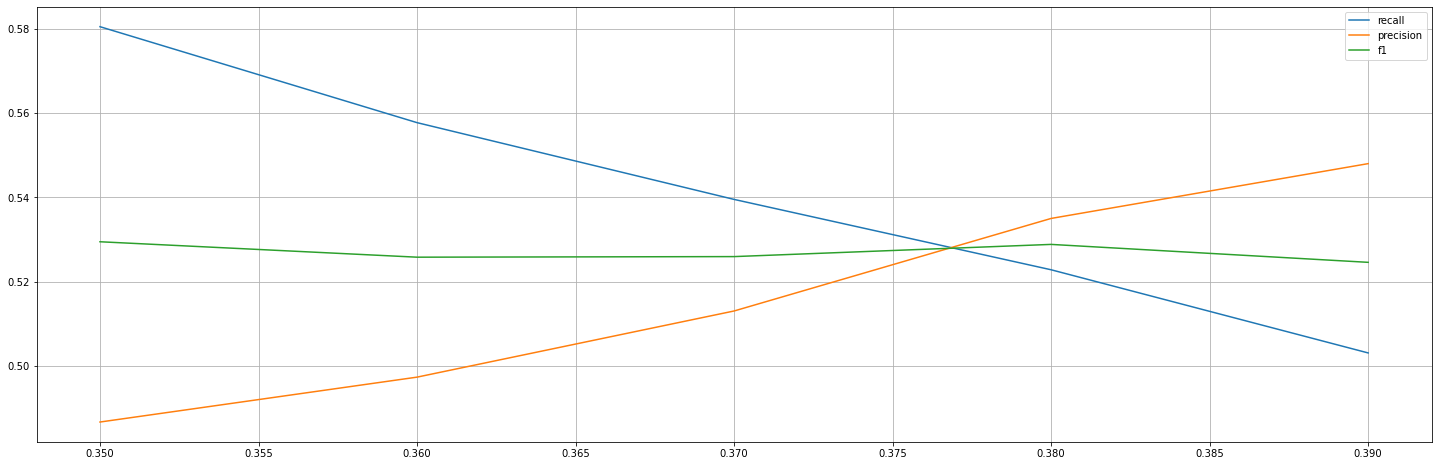

In [82]:
rec = []
pre = []
f11 = []
qw = []
q = (i/100 for i in range(35, 40))
for i in q:
    y_pred_proba = np.asarray([np.where(line>i, 1, 0) for line in y_proba['2']])
    rec.append(recall_score(y_test, y_pred_proba))
    pre.append(precision_score(y_test, y_pred_proba))
    f11.append(f1_score(y_test, y_pred_proba))
    qw.append(i)
y_pred_proba

plt.plot(qw, rec, label='recall')
plt.plot(qw, pre, label='precision')
plt.plot(qw, f11, label='f1')
plt.legend()
plt.grid()
plt.show()

In [83]:
y_pred_train = xgb.predict_proba(x_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['1', '2'])
y_pred_train_ = np.asarray([np.where(line>0.377, 1, 0) for line in y_pred_train['2']]) # 0.3445
y_pred_proba = np.asarray([np.where(line>0.377, 1, 0) for line in y_proba['2']])
print(f1_score(y_test, y_pred_proba))
print(f1_score(y_train, y_pred_train_))
print(classification_report(y_test, y_pred_proba))

0.526235741444867
0.9319336268201828
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1592
           1       0.53      0.53      0.53       658

    accuracy                           0.72      2250
   macro avg       0.67      0.67      0.67      2250
weighted avg       0.72      0.72      0.72      2250



In [23]:
0.5444866920152092
0.5670419651995906
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1592
           1       0.54      0.54      0.54       658

    accuracy                           0.73      2250
   macro avg       0.68      0.68      0.68      2250
weighted avg       0.73      0.73      0.73      2250

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
aaa

### подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
               }
grid = GridSearchCV(xgb, parametrs, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

In [ ]:
# param = {'max_depth': 1,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 50}

### гипотезы

In [ ]:
# data['годовой доход'][data['годовой доход']==0] = data['годовой доход'].median()
# data['кредитный рейтинг'][data['кредитный рейтинг']==0] = data['кредитный рейтинг'].median()

In [ ]:
# data['кредитный рейтинг'][data['кредитный рейтинг']>1000] = data['кредитный рейтинг']/10

### визуальная оценка данных

In [ ]:
data

In [ ]:
good_data

In [ ]:
name = good_data[2]
sns.boxplot(data[name])
data[name][data[name]>25] = data[name].median()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
xgb = XGBClassifier(eta=0.62, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=7 )
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
f1_score(y_test, y_pred)


In [ ]:
rec = []
pre = []
f11 = []
qw = []
q = (i/1000 for i in range(325, 330))
for i in q:
    y_pred_proba = np.asarray([np.where(line>i, 1, 0) for line in y_proba['2']])
    rec.append(recall_score(y_test, y_pred_proba))
    pre.append(precision_score(y_test, y_pred_proba))
    f11.append(f1_score(y_test, y_pred_proba))
    qw.append(i)
y_pred_proba

plt.plot(qw, rec, label='recall')
plt.plot(qw, pre, label='precision')
plt.plot(qw, f11, label='f1')
plt.legend()
plt.show()

In [ ]:
y_pred_train = xgb.predict_proba(x_train)
y_pred_train = pd.DataFrame(y_pred_train, columns=['1', '2'])
y_pred_train_ = np.asarray([np.where(line>0.3274, 1, 0) for line in y_pred_train['2']])
y_pred_proba = np.asarray([np.where(line>0.3274, 1, 0) for line in y_proba['2']])
print(f1_score(y_test, y_pred_proba))
print(f1_score(y_train, y_pred_train_))
print(classification_report(y_test, y_pred_proba))

In [ ]:
confusion_matrix(y_test, y_pred_proba), accuracy_score(y_test, y_pred_proba)

### окончательная модель

In [ ]:
xgb = XGBClassifier(eta=0.62, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=7 )
xgb.fit(data, target)
y_pred_train_ = np.asarray([np.where(line>0.3274, 1, 0) for line in xgb.predict_proba(data)[:, 1]])
f1_score(target, y_pred_train_), accuracy_score(target, y_pred_train_)

In [ ]:
data_test = pd.read_csv('course_project_test.csv')
data_test.rename(columns=name_columns, inplace=True)
name = good_data[2]
data_test[name][data_test[name]>25] = data[name].median()
data_test.drop(del_data, axis=1)
god_dohod(data_test)
dummy(data_test, 'домовладение')
dummy(data_test, 'количество лет на текущем месте работы')
dummy(data_test, 'цель кредита')
dummy(data_test, 'срок кредита')

In [ ]:
data_test

In [ ]:
y_pred_test_data = pd.DataFrame(data_test.index, columns=['id'])
y_pred_test_data['Credit Default'] = np.asarray([np.where(line>0.3274, 1, 0) for line in xgb.predict_proba(data_test)[:, 1]])
y_pred_test_data

In [ ]:
y_pred_test_data.to_csv('PMakov_predictions.csv', index=False)
x = pd.read_csv('PMakov_predictions.csv')
x